In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

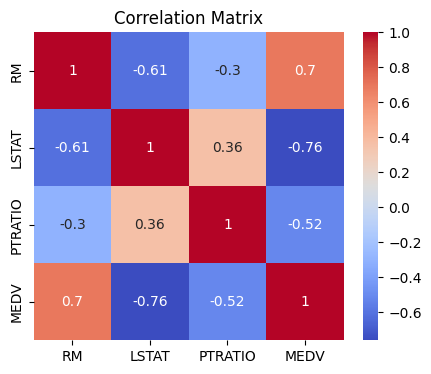

In [8]:
#Correleation Matrix to understand the relationships
corr=df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

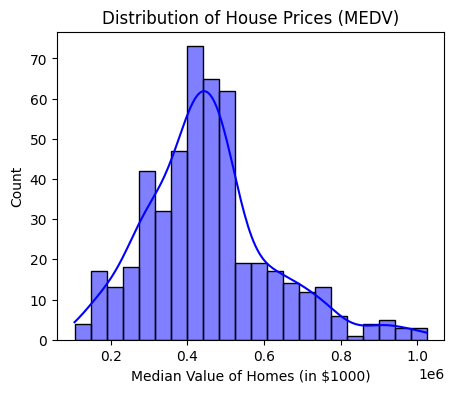

In [14]:
#Plot distribution of the target variable (MEDV: Median Value of homes)
plt.figure(figsize=(5,4))
sns.histplot(df['MEDV'],kde=True,color='blue')
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value of Homes (in $1000)')
plt.show()

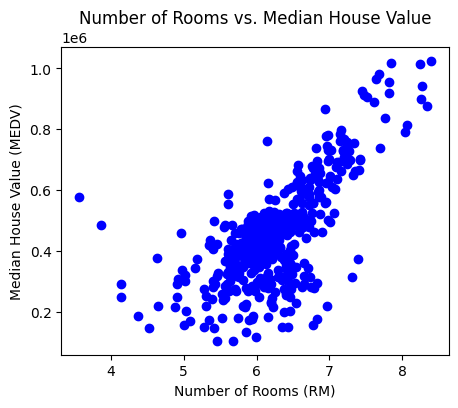

In [22]:
#Scatter plot of a features RM: number of rooms and target (MEDV)
plt.figure(figsize=(5,4))
plt.scatter(df['RM'], df['MEDV'], color='blue')
plt.title('Number of Rooms vs. Median House Value')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression

In [23]:
# Define feature (X) and target (y)
x=df[['RM']]
y=df[['MEDV']]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)
y_pred

array([[402268.84319813],
       [486395.161905  ],
       [534726.91304113],
       [309239.30717671],
       [499114.04378293],
       [362658.61106401],
       [363567.10262672],
       [722057.87327177],
       [337402.5456207 ],
       [525823.69572658],
       [416441.3115764 ],
       [393729.02250867],
       [347941.04774812],
       [307422.32405129],
       [559982.97848445],
       [491482.71465617],
       [461320.79477423],
       [449328.70614647],
       [514740.09866153],
       [406811.30101168],
       [457868.52683593],
       [443514.36014513],
       [489484.03321821],
       [642655.71069098],
       [466408.3475254 ],
       [441152.28208209],
       [439153.60064413],
       [570884.87723696],
       [591598.48486673],
       [316325.54136584],
       [557620.9004214 ],
       [345397.27137254],
       [494026.49103176],
       [473131.18508945],
       [361386.72287622],
       [460230.60489898],
       [520191.04803779],
       [417349.8031391 ],
       [6624

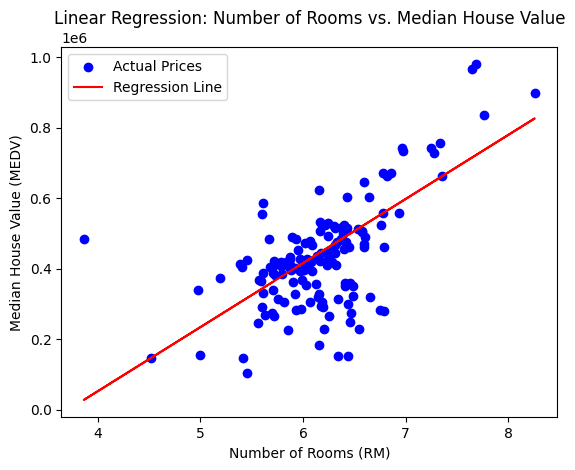

In [30]:
plt.scatter(x_test,y_test,color='blue',label="Actual Prices")
plt.plot(x_test,y_pred,color='red',label="Regression Line")
plt.title('Linear Regression: Number of Rooms vs. Median House Value')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.legend()
plt.show()

In [45]:
mse_linear= mean_squared_error(y_test, y_pred)
r2_linear= r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14289038818.453955
R-squared: 0.37356691849360313


### Multivariable Linear Regression

In [31]:
X=df[['RM','LSTAT','PTRATIO']] 
Y=df['MEDV']

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [36]:
Model=LinearRegression()
Model.fit(X_train,Y_train)

LinearRegression()

In [37]:
Y_pred=Model.predict(X_test)
Y_pred

array([344506.48759061, 506327.27976616, 415353.17017023, 239962.0638801 ,
       333649.61312595, 401230.97912683, 264056.48923987, 704358.32553736,
       361900.16646324, 585599.74279969, 458070.5138275 , 366913.20262379,
       268670.15468047, 267718.35118014, 392280.21702029, 525044.97389849,
       391510.78781294, 368227.37572129, 371107.26023188, 421832.76471511,
       460366.51655741, 462133.34241751, 374289.39760319, 645665.29334293,
       468445.23405715, 473055.42999718, 499307.03253566, 633910.24603752,
       679721.90733453, 174088.88854258, 516081.33085896, 243811.15979967,
       535382.7619211 , 507220.40788046, 306309.22993104, 500927.76305976,
       632077.16476245, 497596.04830371, 666055.63413931, 640385.20672343,
       420649.21237257, 410835.73427035, 321338.18831028, 454006.4471657 ,
       390447.49953726, 580770.60217368, 351805.33816739, 393689.82082646,
       411701.07841305, 392707.53395954, 280177.89601337, 583092.8579051 ,
       569964.54038377, 4

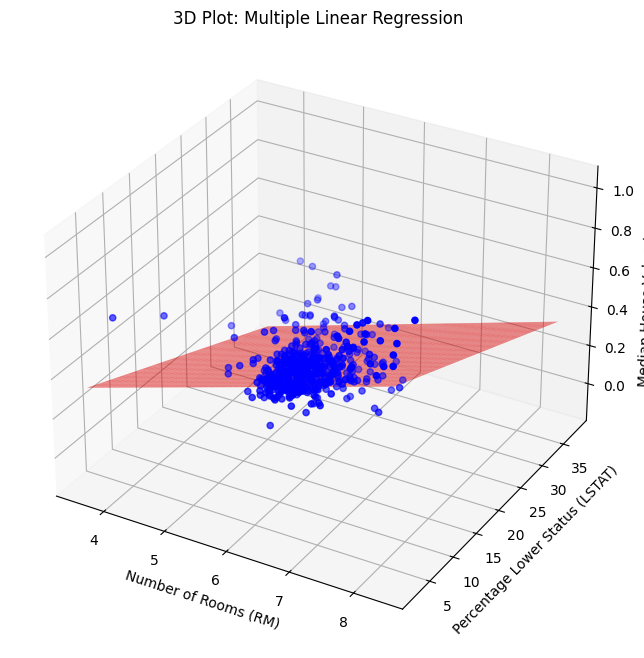

In [43]:
from mpl_toolkits.mplot3d import Axes3D
X = df[['RM', 'LSTAT']].values
Y = df['MEDV'].values
model = LinearRegression()
model.fit(X, Y)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Actual data')
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)
ax.set_xlabel('Number of Rooms (RM)')
ax.set_ylabel('Percentage Lower Status (LSTAT)')
ax.set_zlabel('Median House Value (MEDV)')
ax.set_title('3D Plot: Multiple Linear Regression')
plt.show()

In [46]:
mse_multi=mean_squared_error(Y_test, Y_pred)
r2_multi=r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14289038818.453955
R-squared: 0.37356691849360313


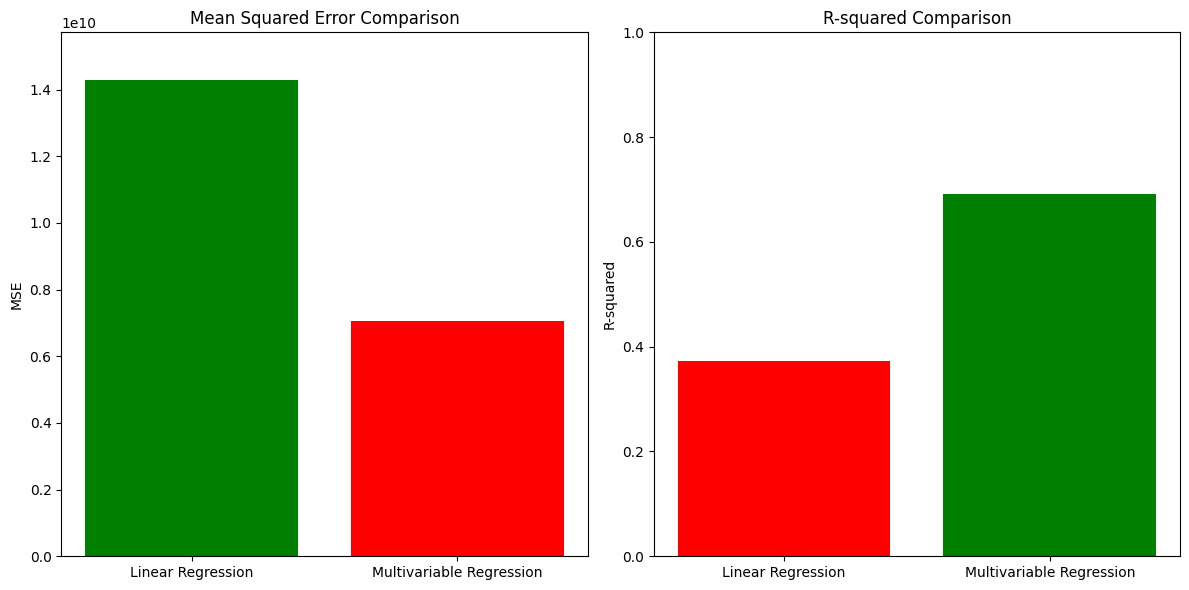

In [51]:
mse_values=[mse_linear,mse_multi]
r2_values=[r2_linear,r2_multi]

# Model labels
models=['Linear Regression', 'Multivariable Regression']

# Set colors based on values
mse_colors=['red' if mse == min(mse_values) else 'green' for mse in mse_values]
r2_colors=['red' if r2 == min(r2_values) else 'green' for r2 in r2_values]


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for MSE
ax[0].bar(models, mse_values, color=mse_colors)
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_ylabel('MSE')
ax[0].set_ylim([0, max(mse_values) * 1.1])

# Bar plot for R-squared
ax[1].bar(models, r2_values, color=r2_colors)
ax[1].set_title('R-squared Comparison')
ax[1].set_ylabel('R-squared')
ax[1].set_ylim([0, 1])


plt.tight_layout()
plt.show()

**Inference**: 
Including multiple features in the regression (multivariable model) leads to better predictive performance than using only one feature (Linear regression), as seen by the lower error and higher explanatory power.
